# MOSAIC

In [2]:
#we need import necessary libraries
import rasterio
from rasterio.merge import merge
import glob
import os
from rasterio.plot import show

##### directory, search criteria and create list

In [3]:
#input directory and tif creation
dir = os.getcwd()
directorioentrada= dir + "/imagenes/"
directoriosalida= dir + "/Output/Lista.tif"


In [4]:
#we create a search criteria for the file
criteriobusqueda =  "B*.tif"  
#we create a search criteria variable called q
q = os.path.join(directorioentrada, criteriobusqueda)
#verificate
print(q)

/home/jovyan/work/GitHub/BinderTester/imagenes/B*.tif


In [5]:
# The glob.glob () function returns a list with the inputs that match the specified pattern
archivoslista  =  glob.glob(q)   
#verificate
archivoslista

#we create an empty list to add the tifs
archivosamosaicar=[]

['/home/jovyan/work/GitHub/BinderTester/imagenes/B3.tif', '/home/jovyan/work/GitHub/BinderTester/imagenes/B4.tif', '/home/jovyan/work/GitHub/BinderTester/imagenes/B8.tif']


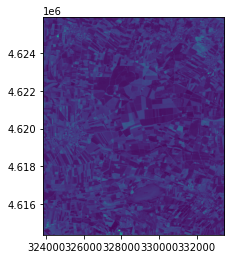

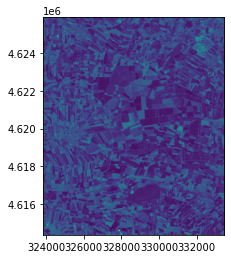

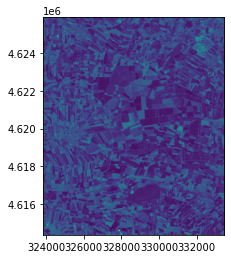

<AxesSubplot:>

In [18]:
print(archivoslista)
a = rasterio.open(archivoslista[0])
b = rasterio.open(archivoslista[1])
c = rasterio.open(archivoslista[2])
show(a)
show(b)
show(c)


In [19]:
# we create a loop to go through the list and insert the files in the empty list created previously
for x in archivoslista:
    ras=rasterio.open(x)
    archivosamosaicar.append(ras)

##### execute the function

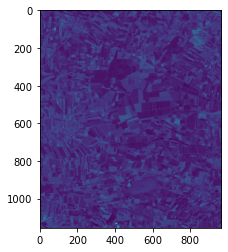

<AxesSubplot:>

In [20]:
#We execute the mosaic function with the necessary parameters
mosaic, out_trans = merge(archivosamosaicar)
#show to verify
show(mosaic)

##### Metadata and output

In [21]:
#copy the metadata
out_meta = ras.meta.copy()

In [22]:
#metadata
out_meta.update({"driver": "GTiff",
                          "height": mosaic.shape[1],
                          "width": mosaic.shape[2],
                          "transform": out_trans,
                          "crs": 'epsg:32631'
                          }
                         )

In [23]:
#write the file
with rasterio.open(directoriosalida, "w", **out_meta) as dest:
    dest.write(mosaic)  

In [24]:
print("Finalizado")

Finalizado
